# Descriptive Statistic

deskriptive statistic ==> meringkas, mengatur data supaya lebih mudah dipahami tanpa membuat kesimpulan dari keseluruhan populasi sample
Type :
- measure of central tendency
- measure of variabillity (spread)

Populasi adalah sekumpulan data yang akan diobservasi

Sample
- sekumpulan kecil dari populasi

Outlier (Pencilan)
- titik data yang berbeda secara significant dari sebagian besar sample/populasi


Penyebab Outlier :
- Natural variation of data
- Change in the behaviour of the observed system
- data collection errors

Measure of central tendency 
- MEAN (nilai rata rata)
- MODUS (nilai yang sering muncul)
- MEDIAN (equal dengan percentile 50% setelah diurutkan)

Measure of spread ==> mencari kesimpulan terhadap sebaran data
- Standard deviation
- Mean (absolute) deviation
- Variance (kuadrat dari Standard deviation)
- Range (jarak nilai tertinggi dan terendah)
- Percentile (see quartile, data harus diurutkan)
- Quartile (Q1 = Percentile 25%, Q2 = Percentile 50% = Median, Q3 = Percentile 75% ==> data harus diurutkan)
- Skewness (2 type : skewness positive (ekor ke kanan) dan skewness negatif (ekor ke kiri))
- Kurtosis
- Correlation (simbol adalah 'r'.. jika mendekati 1 atau -1 adalah semakin bagus)

# Statistic in Phyton

In [6]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib as mpl
import scipy.stats
%matplotlib inline

In [9]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [10]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

In [11]:
print(y)

[ 8.   1.   2.5  4.  28. ]


In [12]:
print(y_with_nan)

[ 8.   1.   2.5  nan  4.  28. ]


In [13]:
print(z)

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64


In [14]:
print(z_with_nan)

0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


# measure central tendency

- MEAN
- WEIGHTED MEAN
- GEOMETRIC MEAN
- HARMONIC MEAN
- MODUS
- MEDIAN

## Mean

In [15]:
Mean_ = sum(x)/len(x)
Mean_

8.7

In [21]:
#another way to find mean
print(z.mean()) #pandas
print(np.mean(x)) #numpy
print(statistics.mean(x)) #package statistics

8.7
8.7
8.7


In [23]:
#mean with nan
print(sum(x_with_nan) / len(x_with_nan)) # python

nan


In [24]:
print(statistics.mean(x_with_nan)) # package statistics

nan


In [25]:
print(np.mean(y_with_nan)) # numpy

nan


In [26]:
print(np.nanmean(y_with_nan)) # numpy juga, bisa handle data nan

8.7


In [27]:
print(z_with_nan.mean()) # pandas

8.7


## Weighted Mean
Rata rata dengan bobot tertentu

In [36]:
x = [8.0, 1, 2.5, 4, 28.0]
Weighted = [0.1, 0.2, 0.3, 0.25, 0.15]  # <-- bobot ratio, bacanya 10%, 20%, 30%, and so on

In [37]:
WMean = sum(Weighted[i] * x[i] for i in range(len(x))) / sum(Weighted)

In [38]:
print(WMean)

6.95


In [40]:
#another way

total = 0
for i in range(len(x)):
    total += Weighted[i] * x[i]

WMean = total * sum(Weighted)
    

In [41]:
WMean

6.95

In [43]:
#another wy dengan menggunakan numpy dan pandas series
y = np.array(x)
z = pd.Series(x)
w = np.array(Weighted)

WMean = np.average(y, weights = w) # <-- numpy
WMean

6.95

In [45]:
WMean = np.average(z, weights = w) # <-- pandas Series yang di numpy kan
WMean

6.95

## Harmonic Mean
Reciprocal dari rata rata dari semua item dalam dataset. Reciprocal = 1 per value


jumlah data / ((1 / data1) + (1 / data2) + ...)

In [46]:
x

[8.0, 1, 2.5, 4, 28.0]

In [48]:
#cara biasa
HMean = len(x)/sum(1/item for item in x)
HMean

2.7613412228796843

In [53]:
#cara package statistics
HMean = statistics.harmonic_mean(x)
HMean

2.7613412228796843

In [55]:
y

array([ 8. ,  1. ,  2.5,  4. , 28. ])

In [57]:
#cara package scipy
HMean = scipy.stats.hmean(y) #np array
HMean

2.7613412228796843

In [59]:
HMean = scipy.stats.hmean(z) #pandas Series
HMean

2.7613412228796843

## Geometric Mean
Membandingkan berbagai hal dengan properti yang sangat berbeda


Mencari rata rata disaat ada angka dengan skala yang berbeda

In [60]:
# cara biasa
gmean = 1

for i in x:
    gmean *= i
    
gmean **= 1/len(x)

print(gmean)

4.677885674856041


In [61]:
# scipy stats
print(scipy.stats.gmean(y)) # pakai numpy array

4.67788567485604


In [62]:
print(scipy.stats.gmean(z)) # pakai pandas series

4.67788567485604


## Median
Median adalah nilai tengah dari kumpulan data yang sudah diurutkan

In [63]:
x

[8.0, 1, 2.5, 4, 28.0]

In [64]:
sorted(x)

[1, 2.5, 4, 8.0, 28.0]

In [66]:
len(x)

5

In [70]:
#cara manual, sort dulu baru cari nilai median
n = len(x)
if n%2:
    # jumlah angka ganjil
    # angka tengah cuma 1, langsung ambil aja
    med = sorted(x)[round((n-1)/2)] # <-- sort dulu, cari dari data ke-2 dari kiri... ingat... klo dari kiri data pertama adalah index ke-0
else:    
    # jumlah angka genap
    # angka tengah nya ada 2, ditambah lalu dibagi 2
    xs = sorted(x)
    index1 = round(n/2)
    index2 = index1 - 1
    med = (xs[index1] + xs[index2]) / 2

med

4

median_low() --> mengembalikan nilai median yang lebih rendah

median_high() --> mengembalikan nili median yang lebih tinggi

keduanya bisa bekerja dengan syarat datanya adalah ganjil

In [71]:
x

[8.0, 1, 2.5, 4, 28.0]

In [74]:
statistics.median_low(x[:-1]) # --> karena ada index -1 maka data paling kanan akan dibuang dulu, sehingga data hanya punya 4 data item, lalu diurutkan

2.5

In [75]:
statistics.median_high(x[:-1])

4

In [76]:
x_with_nan

[8.0, 1, 2.5, nan, 4, 28.0]

In [77]:
sorted(x_with_nan)

[1, 2.5, 4, 8.0, nan, 28.0]

In [79]:
statistics.median(x_with_nan) # --> median adalah 4 & 8

6.0

In [81]:
statistics.median_low(x_with_nan[:-1])

4

In [82]:
statistics.median_high(x_with_nan[:-1])

4

In [84]:
statistics.median_low(x_with_nan) # --> median adalah 4 & 8

4

In [85]:
statistics.median_high(x_with_nan) # --> median adalah 4 & 8

8.0

In [86]:
y

array([ 8. ,  1. ,  2.5,  4. , 28. ])

In [87]:
sorted(y)

[1.0, 2.5, 4.0, 8.0, 28.0]

In [88]:
np.median(y)

4.0

In [90]:
np.median(y[:-1]) # ---> median adalah 2.5 & 4

3.25

# Mode (Modus)
kumpulan daata yang sering muncul

In [92]:
u = [2, 3, 2, 8, 12, 2]
v = [12, 15, 12, 15, 21, 15, 12]

In [94]:
# cara manual
mod = max((u.count(i), i) for i in set(u))
mod

(3, 2)

In [96]:
mod[1] # <-- angka modus nya

2

In [97]:
mod[0] # <-- berapa kali frekuensi nya

3

In [99]:
print(statistics.mode(v)) # package statistics

12


In [100]:
# pandas punya .mode()
print((pd.Series(u)).mode())

0    2
dtype: int64


In [102]:
print(scipy.stats.mode(u)) #package scipy stats # mode array adalah modusnya, count array adalah frekuensi keluar nya

ModeResult(mode=array([2]), count=array([3]))


# Measure od Variability
- Variance
- Standard Deviation
- Skewness
- Percentile
- Range

## Variance
menunjukkan seberapa jauh dataset dengan mean nya

ddof --> delta degrees of freedom (derajat kebebasan dalam mmilih)

(banyaknya pengamatan bebas dari total pengamatan n)

(total pengamatan n dikurangi dengan banyaknya parameter yang ditaksir)

(df - n - banyaknya parameter (k) )

In [103]:
x

[8.0, 1, 2.5, 4, 28.0]

In [104]:
sorted(x)

[1, 2.5, 4, 8.0, 28.0]

In [105]:
n=len(x)
Mean = sum(x)/n
Var_ = sum((item - Mean)**2 for item in x) / (n-1)

In [106]:
Var_

123.19999999999999

In [107]:
#cara dengan package statistics
Var_ = statistics.variance(x)
Var_

123.2

In [110]:
#numpy
Var_ = np.var(x, ddof=1)
Var_

123.19999999999999

In [113]:
#pandas series
Var_ = y.var(ddof=1)
Var_

123.19999999999999

## Standard Deviation
adalah positive square root dari Variance

In [114]:
#cara manual
stddev = Var_ ** 0.5

In [115]:
stddev

11.099549540409285

In [116]:
#numpy
stddev = np.std(x, ddof=1)
stddev

11.099549540409285

In [119]:
#numpy with nan
stddev = np.nanstd(x_with_nan, ddof=1)
stddev

11.099549540409285

In [121]:
#pandas series
z

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64

In [122]:
z.std(ddof=1)

11.099549540409285

## Skewness
mengukur asimetris sample data

kalau nilai skewness negatif maka akan ada ekor di sebelah kiri

kalau nilai skewness positid maka akan ada ekor di sebelah kanan

In [126]:
x

[8.0, 1, 2.5, 4, 28.0]

In [127]:
sorted(x)

[1, 2.5, 4, 8.0, 28.0]

In [130]:
# cara manual

n = len(x)

Mean_ = sum(x) / n
Var_ = sum((item - Mean_)**2 for item in x) / (n-1)
Stddev = Var_ ** 0.5

In [132]:
Skew_ = (sum((item - Mean_)**3 for item in x) * n / ((n-1)*(n-2)*Stddev**3))

In [133]:
Skew_

1.9470432273905929

In [134]:
#skew menghasilkan nilai positif, sehingga mempunyai ekor ke kanan

In [135]:
#menggunakan scipy
Skew_ = scipy.stats.skew(y, bias=False)
Skew_

1.9470432273905927

In [138]:
#menggunakan pandas series
z_with_nan = pd.Series(x_with_nan)
z_with_nan.skew() # <-- pandas series with nan

1.9470432273905924

In [139]:
z.skew()

1.9470432273905924

## Percentile
sample p percentile adalah kumpulan element data sehingga p% element dalam kumpulan data itu kurang dari atau sama dengan nilai p% tersebut

In [141]:
# hitung pakai package statistics
print(statistics.quantiles(x, n=4, method='inclusive'))

# n adalah yang menentukan datanya dibagi berapa quantile
# kalau 4, dibagi 4, berarti kita dapat % ke 25,50,75
# kalau 2, dibagi 2, berarti kita dapat % ke 50

# method 'exclusive' default nya meng-exclude data outlier
# kalau 'inclusive' maka semua data di include

[2.5, 4.0, 8.0]


In [142]:
#numpy
np.percentile(y, [25, 50, 75])

array([2.5, 4. , 8. ])

In [144]:
#pandas Series
z.quantile([0.25, 0.50, 0.75])

0.25    2.5
0.50    4.0
0.75    8.0
dtype: float64

## Range
jarak antara nilai data maksimum dan data minimum

In [146]:
x

[8.0, 1, 2.5, 4, 28.0]

In [147]:
np.max(x)

28.0

In [148]:
np.min(x)

1.0

In [149]:
np.ptp(x)

27.0

In [150]:
np.ptp(x_with_nan)

nan

In [151]:
z

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64

In [152]:
np.ptp(z)

27.0

## Interquartile
perbedaan antara quartile 1 dan quartile 3

In [153]:
#numpy
np.percentile(y,75) - np.percentile(y,25)

5.5


In [154]:
#pandas Series
z.quantile(0.75) - z.quantile(0.25)

5.5

## Desctriptive Statistics

In [155]:
scipy.stats.describe(y, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(1.0, 28.0), mean=8.7, variance=123.19999999999999, skewness=1.9470432273905927, kurtosis=3.878019618875446)

- nobs --> jumlah data yang diobservasi
- minmax --> data tertinggi dan terendah
- mean --> nilai rata rata
- variance --> nilai variance
- skewness --> nilai skew
- kurtosis --> nilai kurtosis

In [156]:
#pandas series
z.describe()

count     5.00000
mean      8.70000
std      11.09955
min       1.00000
25%       2.50000
50%       4.00000
75%       8.00000
max      28.00000
dtype: float64

## Correllation
3 tipe :

    - Correllation positive
    - Correllation negative
    - No / Weak Correllation

2 alat mengukur korelasi :

- Covariance
- Correllation Coefficient

In [157]:
x = list(range(-10,11))
y = [0,2,2,2,2,3,3,6,7,4,7,6,6,9,4,5,5,10,11,12,14]

In [158]:
x1 = np.array(x)
y1 = np.array(y)

x2 = pd.Series(x1)
y2 = pd.Series(y1)

## Covariance
ukuran yang mengukur arah kekuatan dan arah hubungan antara sepasang variable

In [160]:
x

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [168]:
range(n)

range(0, 21)

In [164]:
n = len(x)
Mean_x = sum(x) / n
Mean_y = sum(y) / n

In [165]:
Mean_x

0.0

In [166]:
Mean_y

5.714285714285714

In [170]:
cov_xy = sum((x[i] - Mean_x) * (y[i]-Mean_y) for i in range(n)) / (n-1)
cov_xy

19.95

In [171]:
#numpy
np.cov(x1, y1)

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [174]:
x1.var(ddof=1)

38.5

In [175]:
y1.var(ddof=1)

13.914285714285711

In [177]:
cov_xy = np.cov(x1, y1)[0, 1]
cov_xy

19.95

In [178]:
#Pandas Series
x2.cov(y2)

19.95

## Correllation Coefficient
- Coefficient > 0 --> korelasi positif
- Coefficient = 1 --> korelasi positif sempurna
- Coefficient < 0 --> korelasi negatif
- Coefficient = -1 --> korelasi negatif sempurna
- Coefficient = 0 --> No / Weak Correllation

Data yang diperlukan :
- Variance x & y
- Std Dev x & y
- Covariance xy

In [182]:
x, y

([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14])

In [184]:
Var_x, Var_y

(38.5, 13.914285714285711)

In [185]:
Mean_x, Mean_y

(0.0, 5.714285714285714)

In [187]:
# cara manual
# covariance tadi dibagi std_x * std_y
Var_x = sum((i - Mean_x)**2 for i in x) / (len(x)-1)
Var_y = sum((i - Mean_y)**2 for i in y) / (len(y)-1)
Std_x, Std_y = Var_x ** 0.5, Var_y ** 0.5
r = cov_xy / (Std_x * Std_y)# cara manual

r

0.861950005631606

Kesimpulan : Coefficient dengan Correlation Positive

In [190]:
#scipy
r, p = scipy.stats.pearsonr(x1, y1)
r,p

(0.861950005631606, 5.122760847201171e-07)

In [192]:
#Pandas Series
r = x2.corr(y2)
r # <-- x terhadap y

0.8619500056316061

In [194]:
r = y2.corr(x2)
r # <-- y terhadap r

0.861950005631606

In [196]:
#numpy
print(np.corrcoef(x1, y1)[0,1])

0.8619500056316061


## Descriptive Statistics dengan data 2D

Database table, csv, google spreadsheet, excel file and so on


bisa dengan numpy, scipy, Pandas Dataframe

In [197]:
a = np.array([[1,1,1],
              [2,3,1],
              [4,9,2],
              [8,27,4],
              [16,1,1]
             ])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [199]:
np.mean(a)

5.4

In [200]:
np.max(a)

27

In [201]:
np.min(a)

1

In [202]:
np.median(a)

2.0

In [203]:
a.var(ddof=1)

53.40000000000001

In [211]:
np.max(a, axis=0)

array([16, 27,  4])

In [212]:
np.max(a, axis=1)

array([ 1,  3,  9, 27, 16])

In [213]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [214]:
np.sum(a, axis=0)

array([31, 41,  9])

In [215]:
a.var(ddof=1, axis=0)

array([ 37.2, 121.2,   1.7])

In [216]:
a.var(ddof=1, axis=1)

array([  0.,   1.,  13., 151.,  75.])

In [219]:
#geometric mean
scipy.stats.gmean(a) # <-- default adalah axis=0

array([4.        , 3.73719282, 1.51571657])

In [220]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [221]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [222]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [224]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [225]:
scipy.stats.describe(a, ddof=1, bias=False) # <-- default = axis=0

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [226]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

## scipy.stats.describe punya:
- nobs
- minmax
- mean
- variance
- skewness
- kurtosis

In [228]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False).variance

53.40000000000001

## DataFrame

In [231]:
row_names = ["first", "second", "third", "fourth", "fifth"]
col_names = ["A", "B", "C"]
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [232]:
df.max()

A    16
B    27
C     4
dtype: int32

In [233]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [234]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [235]:
df.skew()

A    1.325315
B    1.798095
C    1.714392
dtype: float64

In [236]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [237]:
df.max(axis=1)

first      1
second     3
third      9
fourth    27
fifth     16
dtype: int32

In [238]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [240]:
# ambil satu angka dari hasil describe pandas
df.describe().at['std', 'B']

11.009087155618309

## Visualization

In [244]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Boxplot

In [242]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

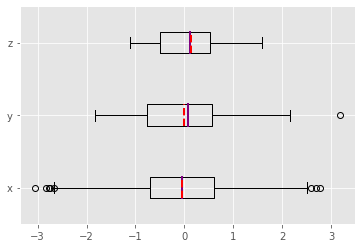

In [257]:
fig, ax = plt.subplots()
ax.boxplot(
    (x, y, z),
    labels = ("x","y","z"),
    medianprops={'linewidth': 2, 'color': 'purple'},
    meanprops={'linewidth': 2, 'color': 'red'},
    vert=False,
    showmeans=True,
    meanline=True
    
)

plt.show;

## Histogram

In [260]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

In [261]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

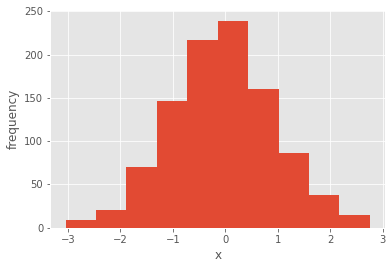

In [267]:
fig, ax = plt.subplots()
ax.hist(
    x,
    bin_edges,
    cumulative = False
)

ax.set_xlabel("x")
ax.set_ylabel("frequency")
plt.show()

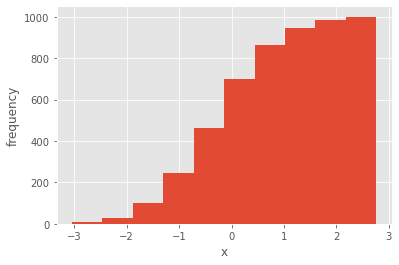

In [271]:
#kumulatif

fig, ax = plt.subplots()
ax.hist(
    x,
    bin_edges,
    cumulative = True
)

ax.set_xlabel("x")
ax.set_ylabel("frequency")
plt.show()

## Pie Chart

In [272]:
x, y, z = 124, 256, 1024

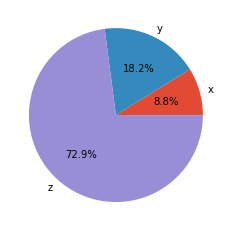

In [279]:
fig, ax = plt.subplots()
ax.pie(
    (x, y, z),
    labels=("x","y","z"),
    autopct = '%1.1f%%'

)

plt.show()

## Bar Chart